In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "tags"

CATEGORIES = ['cargos', 'dronea', 'refuela', 'strikea']


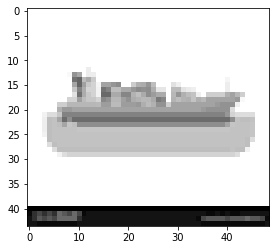

In [3]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    counter = 0
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        if(counter == 10):
            plt.show()
            break
        counter= counter + 1
    break


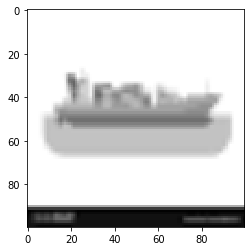

In [4]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap= 'gray')
plt.show()

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                print("Could not train !")

                

create_training_data()
            

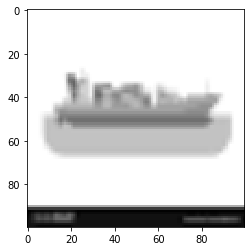

In [6]:
IMG_SIZE = 100
new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [7]:
print (len(training_data))

2321


In [8]:
import random

random.shuffle(training_data)

In [9]:
X = []
y = []

In [10]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [11]:
import pickle

pickle_out = open("Xmul.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("ymul.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [12]:
pickle_in = open("Xmul.pickle", "rb")
X = pickle.load(pickle_in)

In [13]:
X[1]

array([[[148],
        [148],
        [148],
        ...,
        [141],
        [141],
        [141]],

       [[148],
        [148],
        [148],
        ...,
        [142],
        [142],
        [142]],

       [[148],
        [148],
        [148],
        ...,
        [143],
        [143],
        [143]],

       ...,

       [[211],
        [212],
        [213],
        ...,
        [206],
        [206],
        [205]],

       [[211],
        [213],
        [213],
        ...,
        [205],
        [205],
        [203]],

       [[211],
        [212],
        [213],
        ...,
        [205],
        [205],
        [206]]], dtype=uint8)

In [14]:
testing_data =  []

DATADIR = "tags"

CATEGORIES = ['tagtest']

IMG_SIZE = 100

def create_testing_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                test_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                
                testing_data.append([test_array])
            except Exception as e:
                pass
create_testing_data()

In [15]:
print(len(testing_data))

4


In [16]:
test = []

In [17]:
for features in testing_data:
    test.append(features)

test = np.array(test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [18]:
print(test[1])

[[[254]
  [254]
  [254]
  ...
  [255]
  [255]
  [255]]

 [[254]
  [254]
  [254]
  ...
  [255]
  [255]
  [255]]

 [[254]
  [254]
  [254]
  ...
  [255]
  [255]
  [255]]

 ...

 [[255]
  [255]
  [255]
  ...
  [255]
  [255]
  [255]]

 [[255]
  [255]
  [255]
  ...
  [255]
  [255]
  [255]]

 [[255]
  [255]
  [255]
  ...
  [255]
  [255]
  [255]]]


In [19]:
pickle_out = open("testmul.pickle", "wb")
pickle.dump(test, pickle_out)
pickle_out.close()